In [1]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0507(report)/sentence 1/3 class use train data(0507).csv",index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
9753,0.026565,-0.003204,-0.019983,0.006303,0.028031,0.014487,-0.072101,0.031574,0.078573,-0.002256,...,-0.018629,0.011504,-0.028464,-0.055789,-0.053998,-0.011267,0.012146,0.041736,-0.018137,1
4459,0.027183,-0.064539,-0.027726,-0.008735,-0.010557,-0.011296,0.010397,0.010639,0.035143,-0.000430,...,-0.039048,-0.026600,-0.000373,-0.026918,-0.029329,0.034751,0.023100,0.008015,-0.030345,2
18089,0.056439,-0.024830,-0.004742,0.012477,0.072107,0.016949,-0.079584,0.026461,0.080712,0.000277,...,-0.009651,0.021631,-0.018143,-0.054076,-0.038734,-0.014973,0.029642,0.033373,-0.015852,0
996,0.050084,-0.038454,-0.020088,0.017872,0.016645,0.000567,-0.050567,0.013595,0.070374,0.010297,...,-0.037210,-0.016612,-0.012551,-0.028559,-0.003707,0.003725,0.040135,-0.003437,-0.035059,2
3389,0.042280,0.034710,-0.010575,0.039918,0.065134,0.040480,-0.078234,0.047329,0.067445,0.010990,...,0.008959,0.038035,-0.016595,-0.060068,-0.029348,0.008755,0.003903,0.036174,-0.022043,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,0.030436,-0.013888,-0.023153,0.001383,0.040612,0.008310,-0.055057,0.020981,0.094928,-0.015508,...,-0.040328,0.011313,-0.023885,-0.065066,-0.035611,-0.022943,0.038518,0.025133,-0.023450,0
8909,0.075469,-0.035791,-0.019274,0.034627,0.009696,-0.016320,0.013800,-0.012563,0.042240,-0.003039,...,-0.043293,-0.009710,0.000526,-0.030738,-0.041801,0.024832,0.021644,-0.002927,-0.050988,0
12597,0.050968,-0.138988,-0.011835,0.004274,0.029267,0.021201,0.056296,-0.010826,0.006245,0.013582,...,0.035958,0.044038,0.049036,-0.048571,0.047213,0.010352,-0.001775,-0.060403,-0.049395,2
12428,0.023058,-0.072633,0.006806,0.008336,0.008375,-0.014838,-0.029651,0.021040,0.033438,-0.008126,...,-0.041635,-0.058966,-0.027020,-0.054245,-0.033828,0.013196,0.004331,0.000539,-0.006279,0


In [2]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [2]:
# 데이터 불러오기 및 전처리
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0507(report)/sentence 1/3 class use train data(0507).csv",index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0507(report)/sentence 1/3 class use test data(0507).csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [4]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [5]:

X_train = torch.tensor(X_train, dtype=torch.float).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).to(device)
test_y = torch.tensor(test_y, dtype=torch.float).to(device)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([20023, 768])
torch.Size([20023, 3])
torch.Size([300, 768])
torch.Size([300, 3])


In [7]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, shuffle=False)

In [8]:
import torch.nn as nn

class BiLSTMClassifier(nn.Module):
    def __init__(self):
        super(BiLSTMClassifier, self).__init__()
        # X_train의 마지막 차원은 특성의 수(768)를 나타냅니다.
        self.lstm = nn.LSTM(input_size=X_train.shape[1],  # 입력 특성의 크기
                            hidden_size=128,  # LSTM 숨겨진 상태의 크기
                            num_layers=2,  # LSTM 레이어의 수
                            batch_first=True,  # 입력 텐서의 첫 번째 차원이 배치 크기인지 여부
                            bidirectional=False)  # 양방향 LSTM 사용 여부
        self.dropout = nn.Dropout(0.5)  # 드롭아웃 비율
        # 양방향이므로 숨겨진 상태의 크기는 128*2입니다. 출력 크기는 1로 설정하여 2진 분류를 수행합니다.
        self.fc = nn.Linear(128, 3)  # 최종 출력 레이어

    def forward(self, x):
        # LSTM 통과
        x, _ = self.lstm(x)
        # 시퀀스의 마지막 출력만 사용
        x = self.dropout(x[:, -1, :])  # 배치의 마지막 시퀀스 출력 사용
        # 완전 연결 레이어를 통과하여 최종 출력 생성
        x = self.fc(x)
        return x

# 모델 인스턴스 생성 및 장치로 이동
model = BiLSTMClassifier().to(device)

model.to(device)

BiLSTMClassifier(
  (lstm): LSTM(768, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)

In [9]:
from torch.optim.lr_scheduler import StepLR


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.003,weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [10]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt


In [11]:
num_epochs = 50
training_losses = []
validation_losses = []


patience = 20  
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 MPS 장치로 이동
        inputs = inputs = inputs.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
   
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.unsqueeze(1)  
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step()
    
    if best_loss is None:
        best_loss = avg_validation_loss
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        counter = 0  
    else:
        counter += 1  
        if counter >= patience:  
            print("Early stopping!")
            break

print('Test Fine End')



Epoch 1, Training Loss: 0.8253741504070525, Validation Loss: 0.6866911887563765
Epoch 2, Training Loss: 0.6968972417051921, Validation Loss: 0.5948487368350228
Epoch 3, Training Loss: 0.6133823789165406, Validation Loss: 0.5468115762506689
Epoch 4, Training Loss: 0.5266855087822783, Validation Loss: 0.3861392735231008
Epoch 5, Training Loss: 0.4569052671957873, Validation Loss: 0.47436088508853574
Epoch 6, Training Loss: 0.4015789889765833, Validation Loss: 0.32440727721565055
Epoch 7, Training Loss: 0.36635536925045553, Validation Loss: 0.2854590891000165
Epoch 8, Training Loss: 0.32857883755794304, Validation Loss: 0.3143120758282987
Epoch 9, Training Loss: 0.30034614348423455, Validation Loss: 0.23092298904297384
Epoch 10, Training Loss: 0.2804401084304808, Validation Loss: 0.22071014753985746
Epoch 11, Training Loss: 0.26673592402490076, Validation Loss: 0.20217048030489423
Epoch 12, Training Loss: 0.25811983072412703, Validation Loss: 0.2060265496851783
Epoch 13, Training Loss: 0.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np



torch.save(model.state_dict(), 'bilstm model 0506.pt')

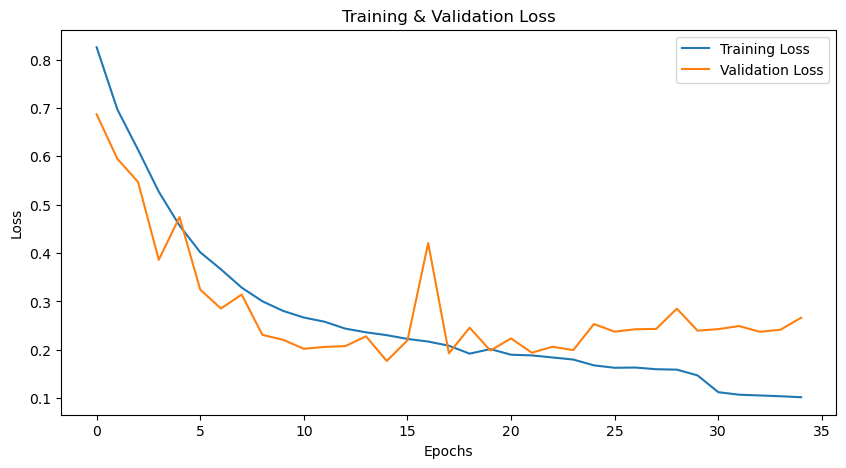

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

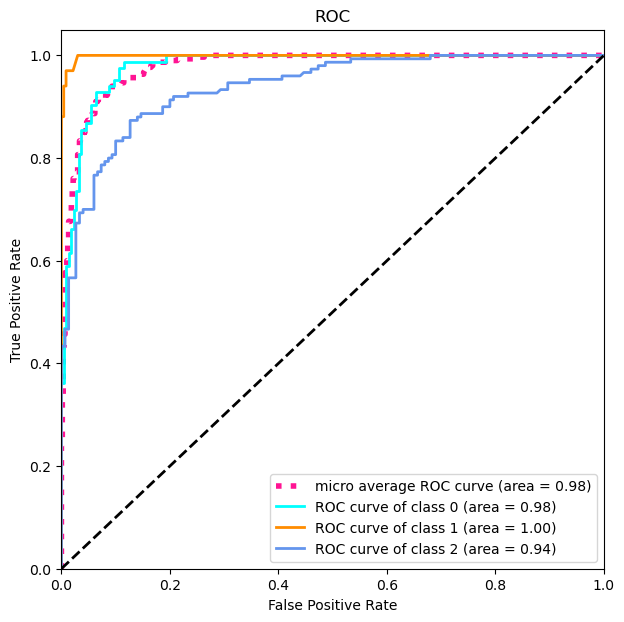

In [14]:

def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

   
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

   
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.unsqueeze(1) 
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=3)

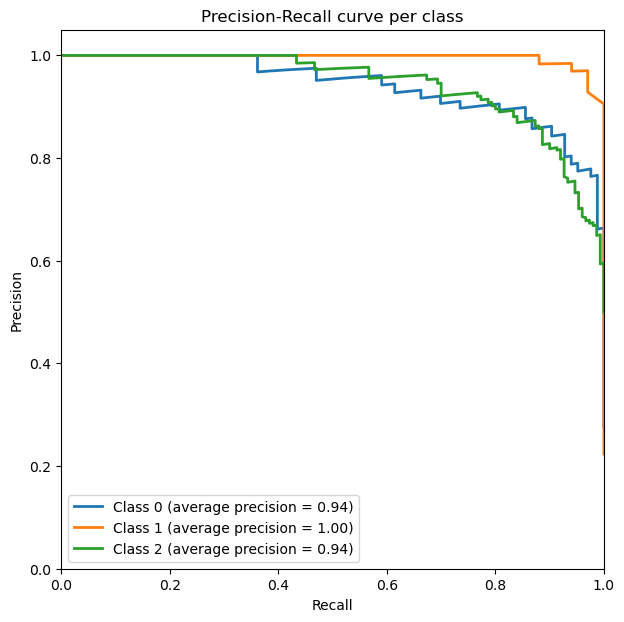

In [15]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
   
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=3)

In [16]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  # 실제 레이블

In [17]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9133333333333333


In [18]:
# 혼동 행렬
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 78   0   5]
 [  0  65   2]
 [ 17   2 131]]


In [19]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [20]:
# 분류 보고서
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        83
           1       0.97      0.97      0.97        67
           2       0.95      0.87      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.93      0.92       300
weighted avg       0.92      0.91      0.91       300



In [21]:
with open("BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)